<a href="https://colab.research.google.com/github/Dhalapathi-DS/Aerofit_analysis/blob/main/aerofit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Aerofit analysis

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Importing libraries:**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

In [2]:
data=pd.read_csv('aerofit_treadmill.csv')
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


**Data overview**

In [3]:
data.size

1620

In [4]:
data.shape

(180, 9)

In [5]:
data.ndim

2

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Descriptive Statistics**

In [7]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**1.Outlier Detection**

**1.1.Age distribution**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


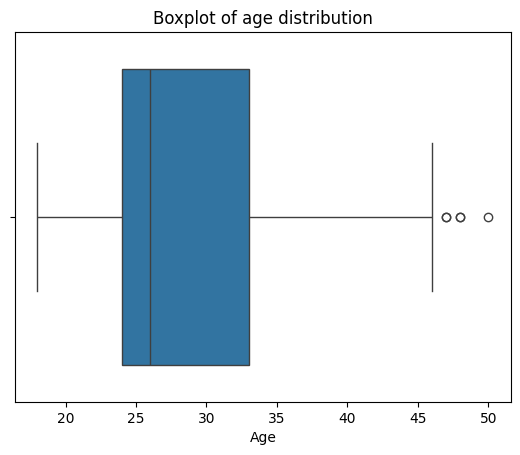

In [9]:
#Boxplot of age distribution
sns.boxplot(x='Age', data=data)
plt.xlabel('Age')
plt.title('Boxplot of age distribution')
plt.show()

**1.2.Income distribution**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


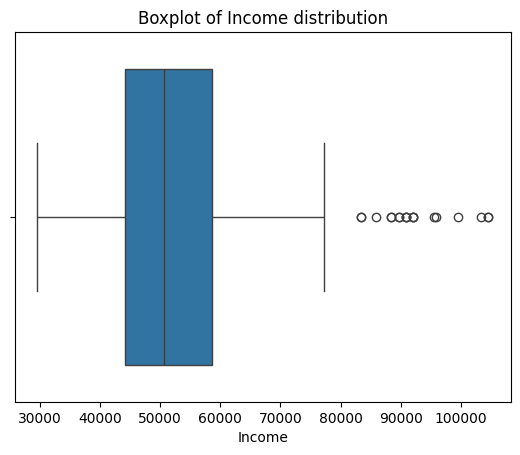

In [10]:
#Boxplot of Income distribution
sns.boxplot(x='Income',data=data)
plt.xlabel('Income')
plt.title('Boxplot of Income distribution')
plt.show()

**1.3.Usage distribution**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


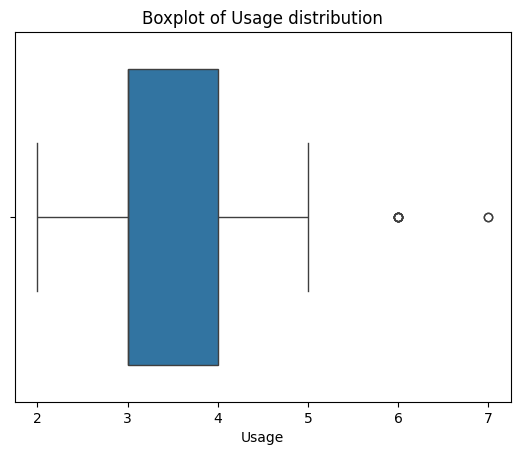

In [11]:
#Boxplot of Usage distribution
sns.boxplot(x='Usage',data=data)
plt.xlabel('Usage')
plt.title('Boxplot of Usage distribution')
plt.show()

**1.4.Miles distribution**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


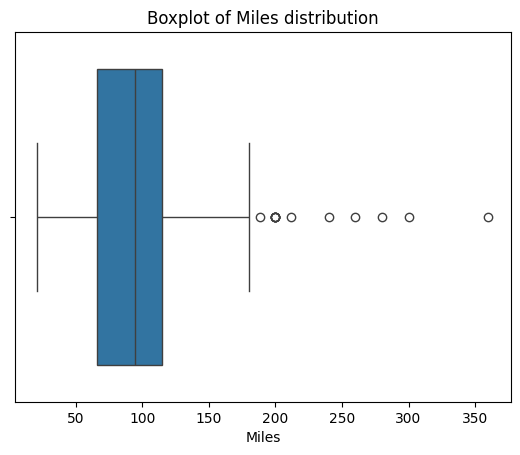

In [12]:
#Boxplot of Miles distribution
sns.boxplot(x='Miles',data=data)
plt.xlabel('Miles')
plt.title('Boxplot of Miles distribution')
plt.show()

In [13]:
miles_outliers = data[data['Miles'] > 200]
outlier_summary = miles_outliers[['Miles', 'Usage']]
outlier_count = miles_outliers.shape[0]
outlier_summary, outlier_count


(     Miles  Usage
 84     212      5
 155    240      6
 166    300      7
 167    280      6
 170    260      6
 173    360      4,
 6)

**1.5.Boxplot of Age by Product**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


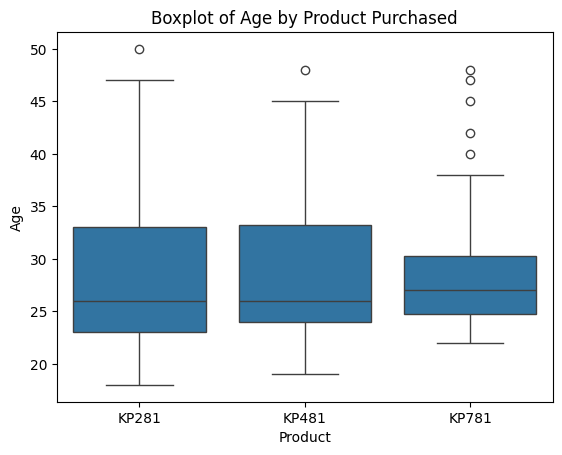

In [14]:
#Boxplot of Age by Product Purchased
sns.boxplot(x='Product', y='Age', data=data)
plt.title('Boxplot of Age by Product Purchased')
plt.show()

**2.Descriptive Analysis for Product Distribution**

**2.1.Percentage of product purchased**

In [15]:
product_crosstab = pd.crosstab(index=data['Product'], columns='Count')
total_customers = product_crosstab['Count'].sum()
product_crosstab['Percentage'] = (product_crosstab['Count'] / total_customers) * 100
product_crosstab = product_crosstab.reset_index()
product_crosstab.columns = ['Product', 'Count', 'Percentage']
product_crosstab


,Product,Count,Percentage
0,KP281,80,44.444444
1,KP481,60,33.333333
2,KP781,40,22.222222


**2.2.Pie Chart of Product Distribution**

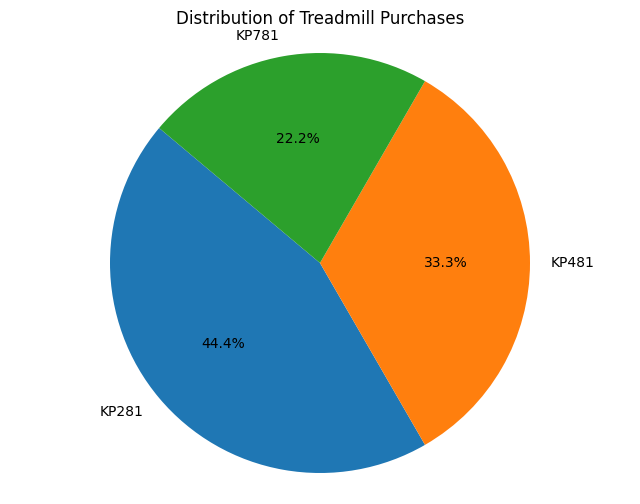

In [16]:
plt.figure(figsize=(8, 6))
plt.pie(product_crosstab['Count'], labels=product_crosstab['Product'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Treadmill Purchases')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

**2.3.Mapping Product Prices**

In [17]:
product_counts = data['Product'].value_counts()
product_counts = product_counts.reset_index()
product_counts.columns = ['Product', 'Count']
price = {
    'KP281': 1500,
    'KP481': 1750,
    'KP781': 2500
}
product_counts['Price ($)'] = product_counts['Product'].map(price)
product_counts

,Product,Count,Price ($)
0,KP281,80,1500
1,KP481,60,1750
2,KP781,40,2500


**Pairplot to Check Correlation**

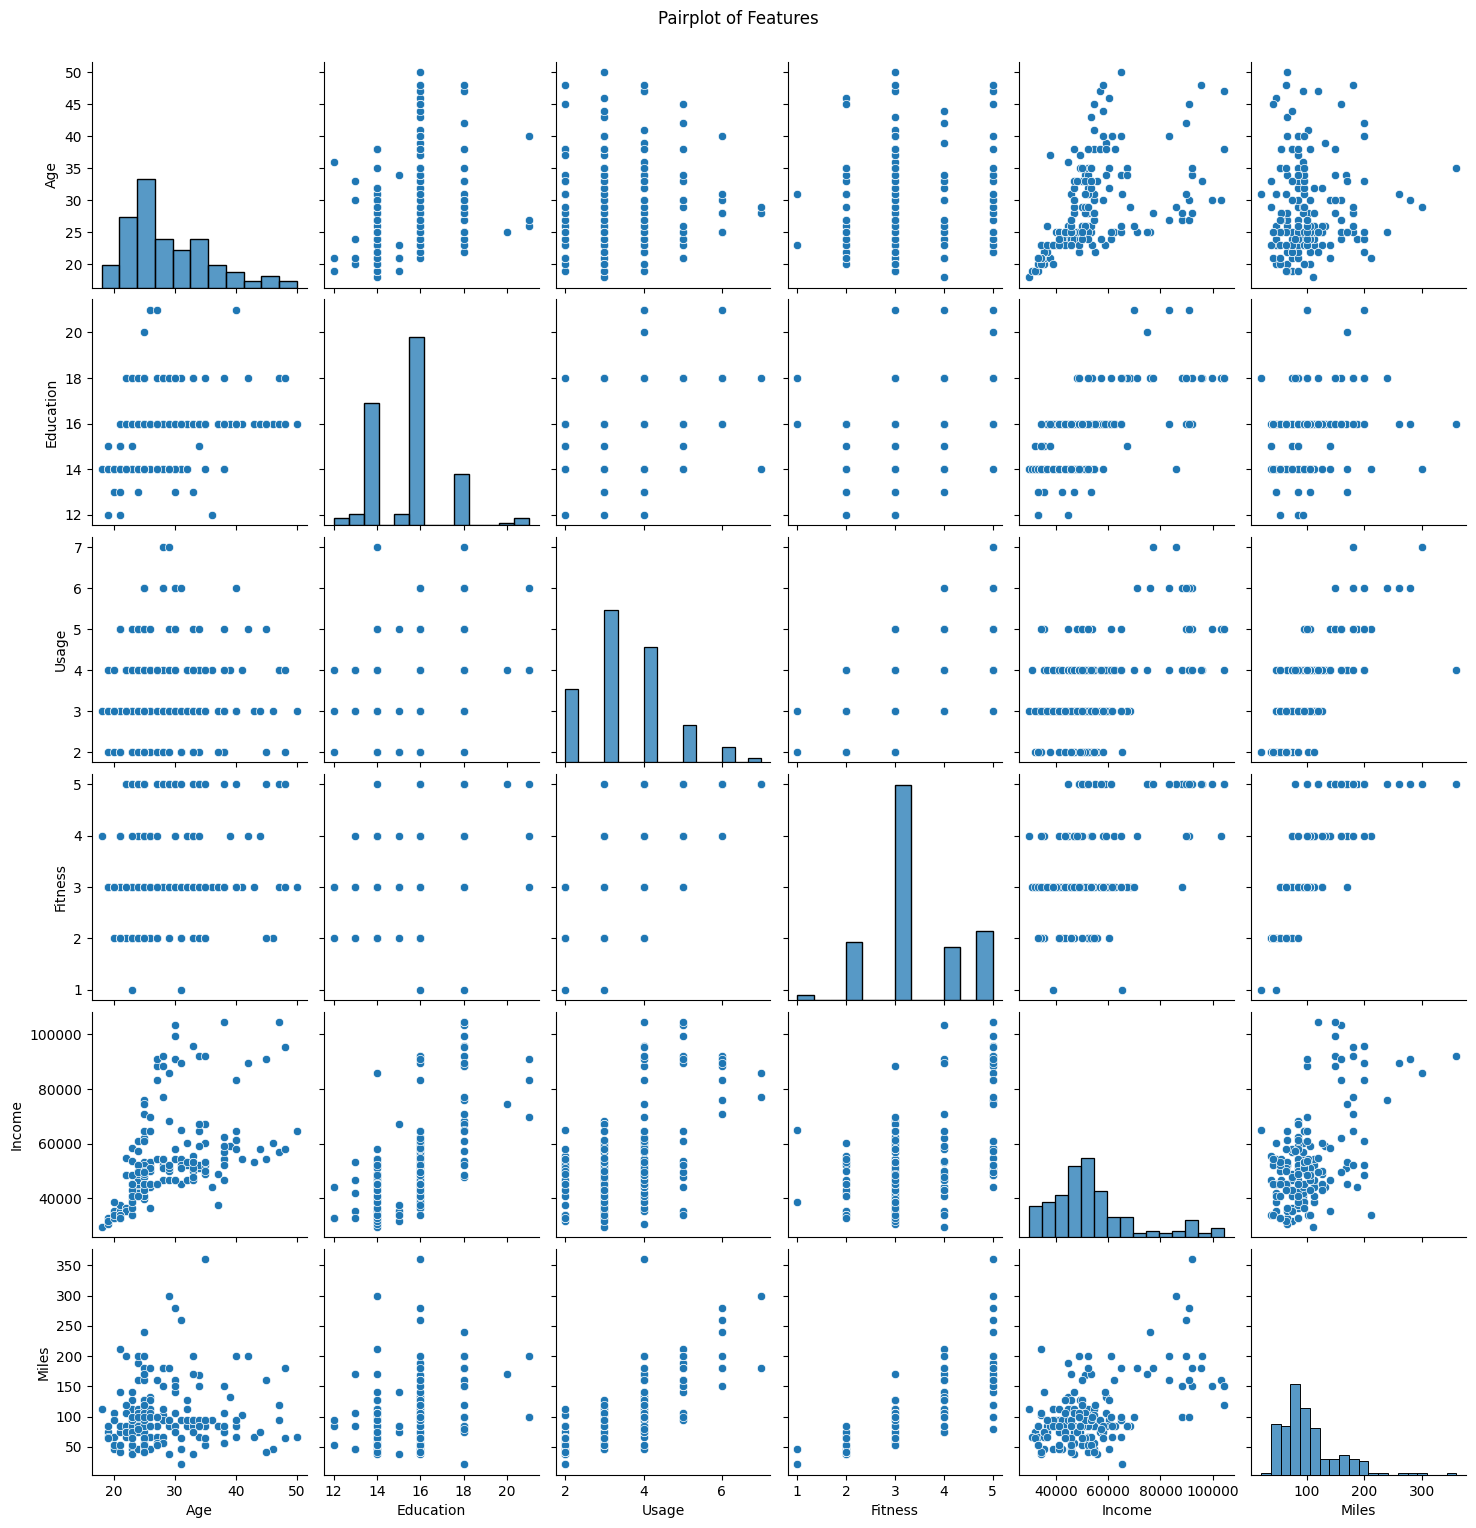

In [ ]:
#pairplot
sns.pairplot(data)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

**3.Exploring gender**

**3.1.Number of male and female**

In [19]:
data['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


**3.2.Gender distribution**

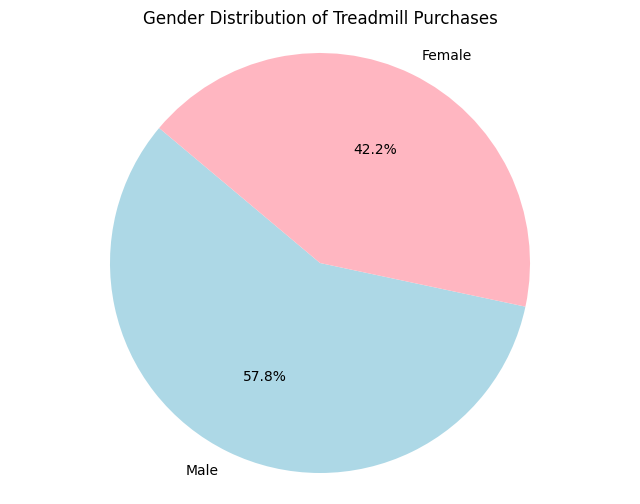

In [20]:
labels = ['Male', 'Female']
sizes = [104, 76]
colors = ['lightblue', 'lightpink']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Treadmill Purchases')
plt.axis('equal')
plt.show()


**3.3.Gender distribution by product type**

In [21]:
#gender_distribution
gender_distribution = pd.crosstab(data['Product'], data['Gender'], margins=True, margins_name="Total")
print(gender_distribution)


Gender   Female  Male  Total
Product                     
KP281        40    40     80
KP481        29    31     60
KP781         7    33     40
Total        76   104    180


**3.4.Gender probability**

In [22]:
gender_prob = data.groupby(['Gender', 'Product']).size() / data.groupby(['Gender']).size()
print(gender_prob)


Gender  Product
Female  KP281      0.526316
        KP481      0.381579
        KP781      0.092105
Male    KP281      0.384615
        KP481      0.298077
        KP781      0.317308
dtype: float64


**3.5.Pie chart for gender distribution by product**

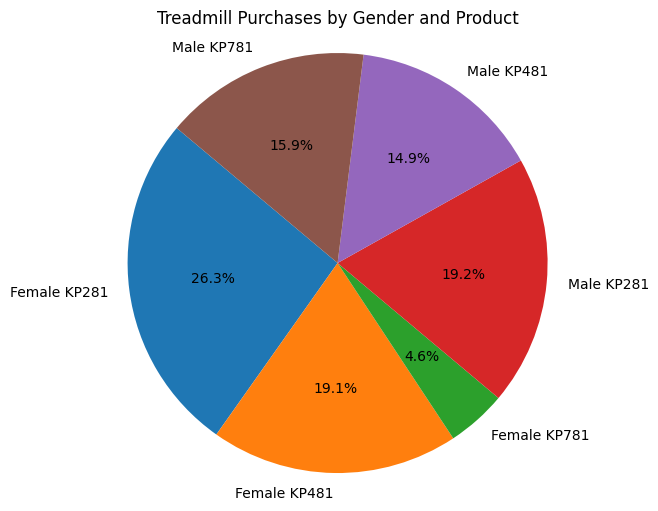

In [23]:
labels = ['Female KP281', 'Female KP481', 'Female KP781', 'Male KP281', 'Male KP481', 'Male KP781']
sizes = [0.526316, 0.381579, 0.092105, 0.384615, 0.298077, 0.317308]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Treadmill Purchases by Gender and Product')
plt.axis('equal')
plt.show()


**3.6.Probability of male customer buying KP781**

In [24]:
# Count the number of male customers who purchased KP781
male_kp781_count = data[(data['Gender'] == 'Male') & (data['Product'] == 'KP781')].shape[0]
print(f'Number of male customers who purchased KP781: {male_kp781_count}')


Number of male customers who purchased KP781: 33


In [25]:
#Male Customer Buying KP781
total_customers = data.shape[0]
total_males = data[data['Gender'] == 'Male'].shape[0]
kp781_males = data[(data['Gender'] == 'Male') & (data['Product'] == 'KP781')].shape[0]
probability_kp781_male = (kp781_males / total_males)
probability_kp781_male

0.3173076923076923

**4.Exploring marital status**

**4.1.Number of single and partnered**

In [26]:
#count of partnered and single
data['MaritalStatus'].value_counts()


,count
MaritalStatus,
Partnered,107
Single,73


**4.2.Percentage**

In [27]:
#percentage
marital_status_counts = data['MaritalStatus'].value_counts(normalize=True) * 100
print(marital_status_counts)


MaritalStatus
Partnered    59.444444
Single       40.555556
Name: proportion, dtype: float64


**4.3.Marital probability**

In [28]:
marital_prob = data.groupby(['MaritalStatus', 'Product']).size() / data.groupby(['MaritalStatus']).size()
print(marital_prob)


MaritalStatus  Product
Partnered      KP281      0.448598
               KP481      0.336449
               KP781      0.214953
Single         KP281      0.438356
               KP481      0.328767
               KP781      0.232877
dtype: float64


**4.4.Countplot**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


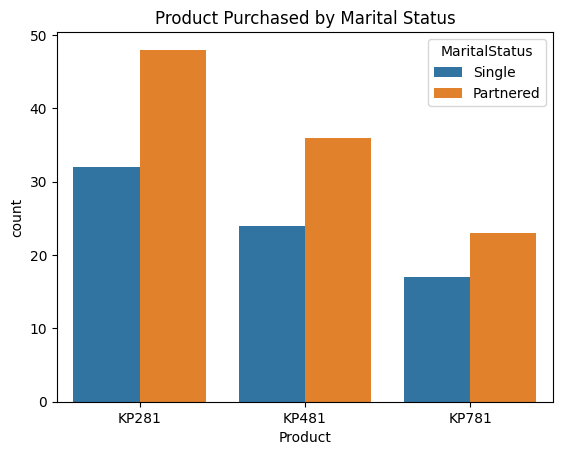

In [29]:
#product purchased vs marital status
sns.countplot(x='Product', hue='MaritalStatus', data=data)
plt.title('Product Purchased by Marital Status')
plt.show()


**5.Exploring Age**

**5.1.Age segment**

In [30]:
bins=[18,20,25,30,35,40,50]
labels=['18-20','20-25','25-30','30-35','35-40','40-50']
data['Age segment']=pd.cut(data['Age'],bins=bins,labels=labels,right=False)
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age segment
0,KP281,18,Male,14,Single,3,4,29562,112,18-20
1,KP281,19,Male,15,Single,2,3,31836,75,18-20
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-20
3,KP281,19,Male,12,Single,3,3,32973,85,18-20
4,KP281,20,Male,13,Partnered,4,2,35247,47,20-25
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,40-50
176,KP781,42,Male,18,Single,5,4,89641,200,40-50
177,KP781,45,Male,16,Single,5,5,90886,160,40-50
178,KP781,47,Male,18,Partnered,4,5,104581,120,40-50


**5.2.Histogram**

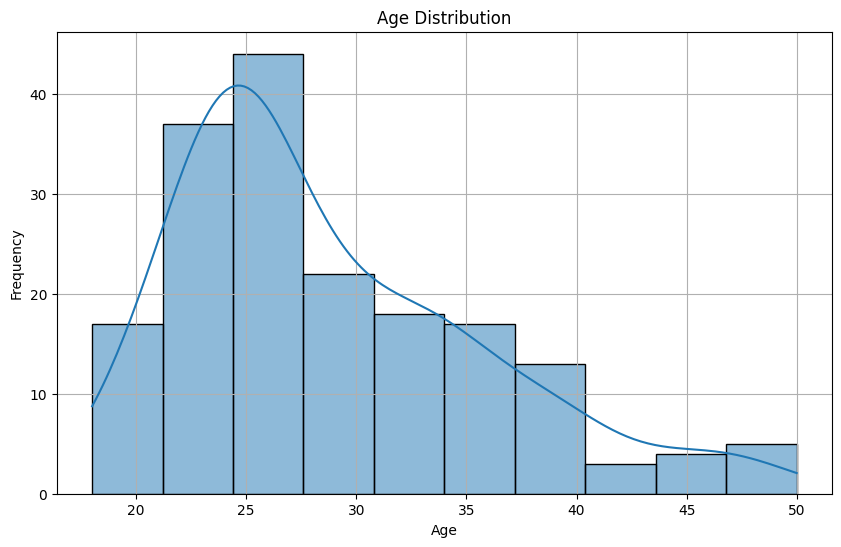

In [31]:
# Plotting histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True)  # Add kde=True for kernel density estimation
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**5.3.Distribution of Product Purchases by Age Segment**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


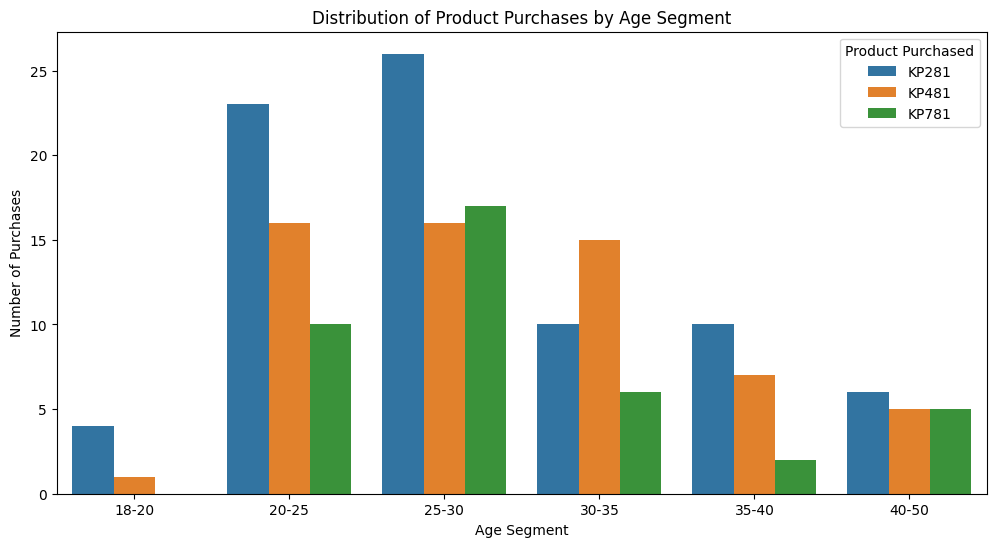

In [32]:
#Distribution of Product Purchases by Age Segment
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Age segment', hue='Product')
plt.title('Distribution of Product Purchases by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Number of Purchases')
plt.legend(title='Product Purchased')
plt.show()

**5.4.Age segment distribution**

In [33]:
#age_segment_distribution
age_segment_distribution = pd.crosstab(data['Age segment'], data['Product'], margins=True, margins_name="Total")
print(age_segment_distribution)


Product      KP281  KP481  KP781  Total
Age segment                            
18-20            4      1      0      5
20-25           23     16     10     49
25-30           26     16     17     59
30-35           10     15      6     31
35-40           10      7      2     19
40-50            6      5      5     16
Total           79     60     40    179


**5.5.Age probability**

In [34]:
age_prob = data.groupby(['Age segment', 'Product']).size() / data.groupby(['Age segment']).size()
print(age_prob)


Age segment  Product
18-20        KP281      0.800000
             KP481      0.200000
             KP781      0.000000
20-25        KP281      0.469388
             KP481      0.326531
             KP781      0.204082
25-30        KP281      0.440678
             KP481      0.271186
             KP781      0.288136
30-35        KP281      0.322581
             KP481      0.483871
             KP781      0.193548
35-40        KP281      0.526316
             KP481      0.368421
             KP781      0.105263
40-50        KP281      0.375000
             KP481      0.312500
             KP781      0.312500
dtype: float64


<ipython-input-34-71fdbb7de3b9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_prob = data.groupby(['Age segment', 'Product']).size() / data.groupby(['Age segment']).size()
<ipython-input-34-71fdbb7de3b9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_prob = data.groupby(['Age segment', 'Product']).size() / data.groupby(['Age segment']).size()


**6.Exploring income**

**6.1.Level of Income**

In [35]:
bins=[0,20000,50000,100000,200000]
labels=['Low','Medium','High','Very High']
data['Level of Income']=pd.cut(data['Income'],bins=bins,labels=labels,right=False)
data


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age segment,Level of Income
0,KP281,18,Male,14,Single,3,4,29562,112,18-20,Medium
1,KP281,19,Male,15,Single,2,3,31836,75,18-20,Medium
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-20,Medium
3,KP281,19,Male,12,Single,3,3,32973,85,18-20,Medium
4,KP281,20,Male,13,Partnered,4,2,35247,47,20-25,Medium
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,40-50,High
176,KP781,42,Male,18,Single,5,4,89641,200,40-50,High
177,KP781,45,Male,16,Single,5,5,90886,160,40-50,High
178,KP781,47,Male,18,Partnered,4,5,104581,120,40-50,Very High


**6.2.Histogram**

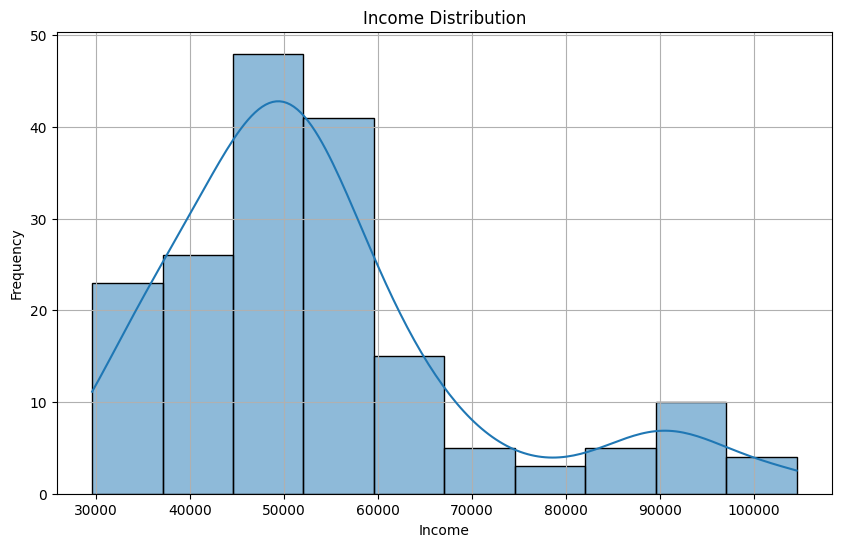

In [36]:
# Plotting histogram for Income
plt.figure(figsize=(10, 6))
sns.histplot(data['Income'], bins=10, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**6.3.Distribution of Product Purchases by Income Class**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


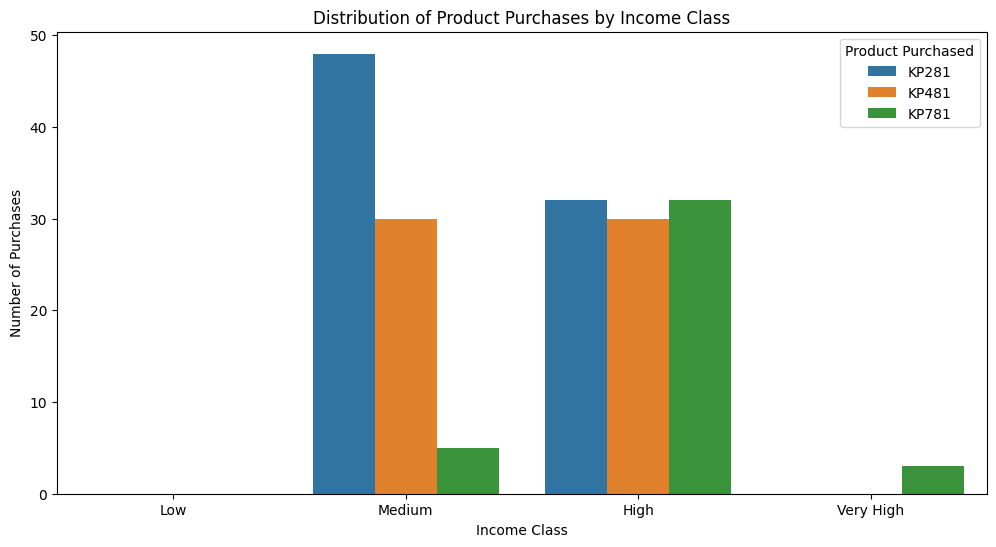

In [37]:
#Distribution of Product Purchases by Income Class
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Level of Income', hue='Product')
plt.title('Distribution of Product Purchases by Income Class')
plt.xlabel('Income Class')
plt.ylabel('Number of Purchases')
plt.legend(title='Product Purchased')
plt.show()

**6.4.Income distribution**

In [38]:
#Income_distribution
Income_distribution = pd.crosstab(data['Level of Income'], data['Product'], margins=True, margins_name="Total")
print(Income_distribution)

Product          KP281  KP481  KP781  Total
Level of Income                            
Medium              48     30      5     83
High                32     30     32     94
Very High            0      0      3      3
Total               80     60     40    180


**6.5.Income probability**

In [39]:
income_prob = data.groupby(['Level of Income', 'Product']).size() / data.groupby(['Level of Income']).size()
print(income_prob)


Level of Income  Product
Low              KP281           NaN
                 KP481           NaN
                 KP781           NaN
Medium           KP281      0.578313
                 KP481      0.361446
                 KP781      0.060241
High             KP281      0.340426
                 KP481      0.319149
                 KP781      0.340426
Very High        KP281      0.000000
                 KP481      0.000000
                 KP781      1.000000
dtype: float64


<ipython-input-39-fc128dc1075f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_prob = data.groupby(['Level of Income', 'Product']).size() / data.groupby(['Level of Income']).size()
<ipython-input-39-fc128dc1075f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_prob = data.groupby(['Level of Income', 'Product']).size() / data.groupby(['Level of Income']).size()


In [40]:
gender_product_crosstab = pd.crosstab(data['Product'], data['Gender'], margins=True, margins_name="Total")
age_product_crosstab = pd.crosstab(data['Product'], data['Age segment'], margins=True, margins_name="Total")
income_product_crosstab = pd.crosstab(data['Product'], data['Level of Income'], margins=True, margins_name="Total")

**7.Exploring education**

**7.1.Level of Education**

In [41]:
bins=[0, 12,16,18,30]
labels=['School level', 'Diploma/UG', 'PG', 'Docterate/Phd']
data['Level of Education']=pd.cut(data['Education'],bins=bins,labels=labels,right=False)
data


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age segment,Level of Income,Level of Education
0,KP281,18,Male,14,Single,3,4,29562,112,18-20,Medium,Diploma/UG
1,KP281,19,Male,15,Single,2,3,31836,75,18-20,Medium,Diploma/UG
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-20,Medium,Diploma/UG
3,KP281,19,Male,12,Single,3,3,32973,85,18-20,Medium,Diploma/UG
4,KP281,20,Male,13,Partnered,4,2,35247,47,20-25,Medium,Diploma/UG
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,40-50,High,Docterate/Phd
176,KP781,42,Male,18,Single,5,4,89641,200,40-50,High,Docterate/Phd
177,KP781,45,Male,16,Single,5,5,90886,160,40-50,High,PG
178,KP781,47,Male,18,Partnered,4,5,104581,120,40-50,Very High,Docterate/Phd


**7.2.Education level distribution**

In [42]:
education_level_distribution = pd.crosstab(data['Level of Education'], data['Product'],margins=True,margins_name="Total")
print(education_level_distribution)

Product             KP281  KP481  KP781  Total
Level of Education                            
Diploma/UG             39     27      2     68
PG                     39     31     15     85
Docterate/Phd           2      2     23     27
Total                  80     60     40    180


**7.3.Education probability**

In [43]:
education_prob = data.groupby(['Level of Education', 'Product']).size() / data.groupby(['Level of Education']).size()
print(education_prob)


Level of Education  Product
School level        KP281           NaN
                    KP481           NaN
                    KP781           NaN
Diploma/UG          KP281      0.573529
                    KP481      0.397059
                    KP781      0.029412
PG                  KP281      0.458824
                    KP481      0.364706
                    KP781      0.176471
Docterate/Phd       KP281      0.074074
                    KP481      0.074074
                    KP781      0.851852
dtype: float64


<ipython-input-43-3b0b02b74751>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_prob = data.groupby(['Level of Education', 'Product']).size() / data.groupby(['Level of Education']).size()
<ipython-input-43-3b0b02b74751>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_prob = data.groupby(['Level of Education', 'Product']).size() / data.groupby(['Level of Education']).size()


**8.Heatmaps**

**8.1.Education Segment vs. Product Purchased**

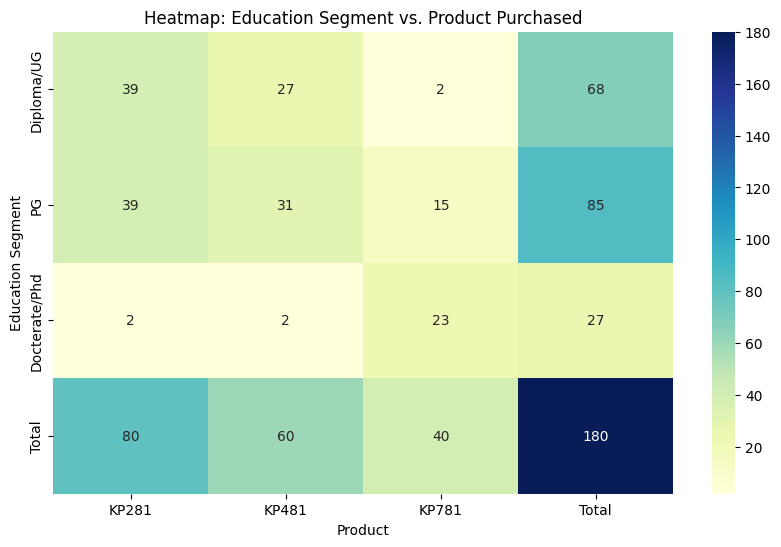

In [44]:
plt.figure(figsize=(10, 6))
sns.heatmap(education_level_distribution, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: Education Segment vs. Product Purchased')
plt.ylabel('Education Segment')
plt.xlabel('Product')
plt.show()

**8.2.Product vs. Gender**

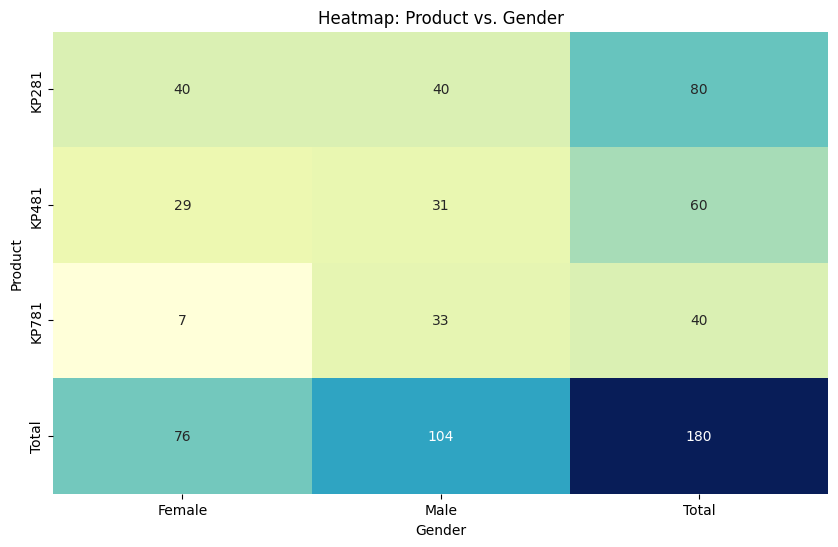

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(gender_product_crosstab, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Heatmap: Product vs. Gender')
plt.ylabel('Product')
plt.xlabel('Gender')
plt.show()


**8.3.Product vs. Age Segment**

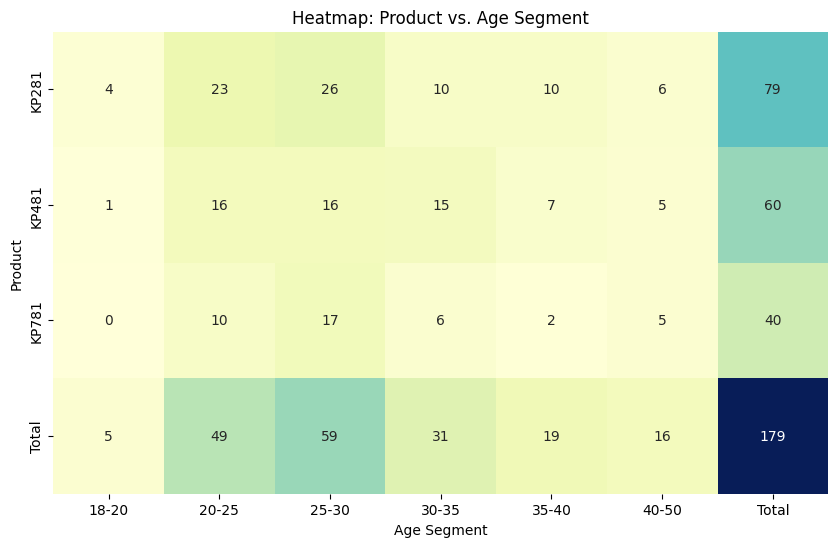

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(age_product_crosstab, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Heatmap: Product vs. Age Segment')
plt.ylabel('Product')
plt.xlabel('Age Segment')
plt.show()


**8.4.Product vs. Income Class**

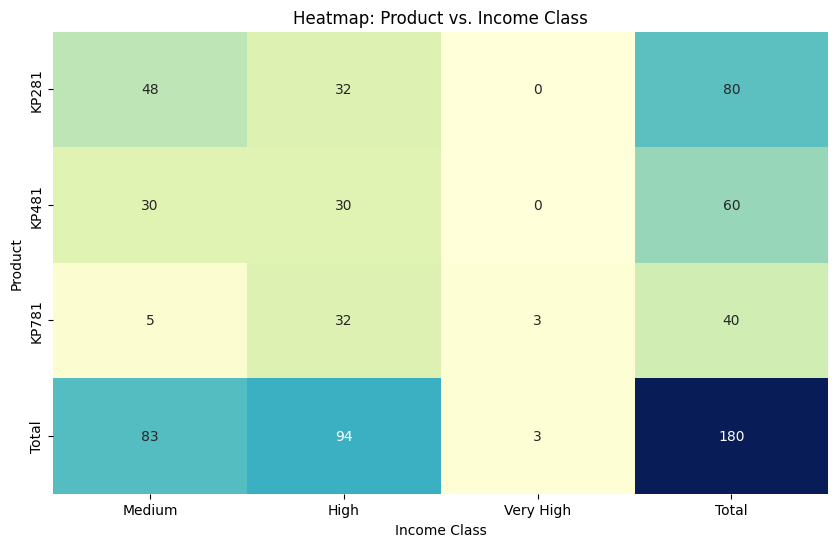

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(income_product_crosstab, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Heatmap: Product vs. Income Class')
plt.ylabel('Product')
plt.xlabel('Income Class')
plt.show()


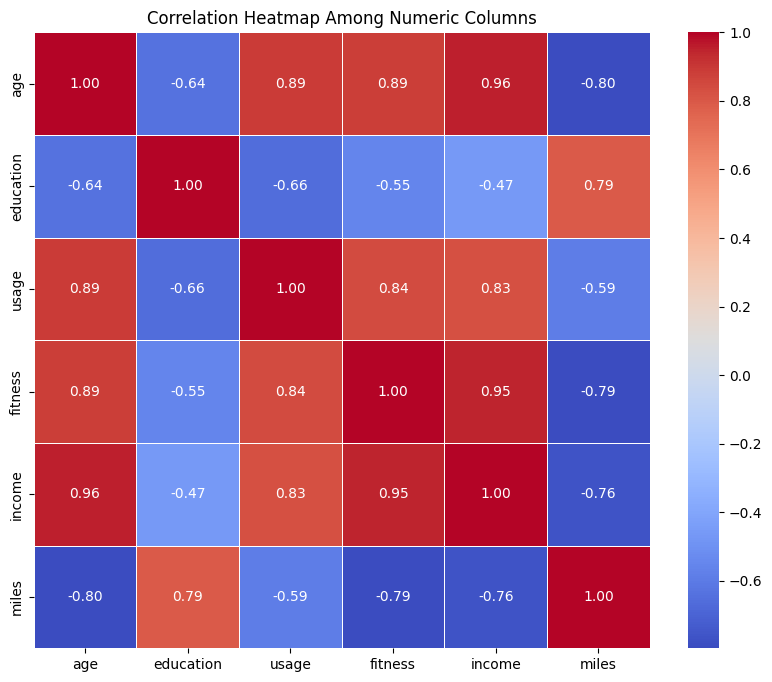

In [48]:
data = pd.DataFrame({
    'age': [25, 30, 22, 45, 28],
    'education': [16, 20, 18, 12, 14],
    'usage': [5, 7, 6, 10, 8],
    'fitness': [3, 4, 2, 5, 4],
    'income': [30000, 45000, 20000, 60000, 35000],
    'miles': [10, 15, 20, 5, 12]
})
numeric_columns = ['age', 'education', 'usage', 'fitness', 'income', 'miles']
data_numeric = data[numeric_columns]
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap Among Numeric Columns')
plt.show()
